💻📝 Análise dos Dados: 

Importando Bibliotecas e o DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importação dos Dados:

Neste projeto, irei analisar uma base de dados da área de biologia e biotecnologia. 

In [2]:
#Para importar os dados, utilizamos um recurso da Biblioteca Pandas. 

import pandas as pd

dados = pd.read_csv('dados_experimentos.csv')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Como o conjunto total de dados é grande e pelo comando .head nós apenas vemos um pedaço de toda a tabela, podemos usar o comando .shape para vermos a quantidade de linhas e colunas. 

In [3]:
dados.shape

(23814, 877)

Para saber o que estou analisando, vou selecionar apenas uma coluna para entender o que elá está mostrando. 

In [4]:
dados['tratamento']

0           com_droga
1           com_droga
2           com_droga
3           com_droga
4           com_droga
             ...     
23809       com_droga
23810       com_droga
23811    com_controle
23812       com_droga
23813       com_droga
Name: tratamento, Length: 23814, dtype: object

Esse tipo de informação, da coluna, é o que chamamos de série. Já a tabela inteira é chamada de dataframe. 

Para verificar as especificações que existem dentro desta coluna, utilizamos o comando .unique()

In [5]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

A resposta que temos é no formato de array (um vetor - um tipo de estrutura de dados).

Percebe-se que a resposta é com_droga e com_controle. A primeira resposta, com_droga, diz que um determinado tipo de remédio foi aplicado à amostra. A segunda, com_controle, é uma técnica estatística que se isola as outras variáveis e observa-se apenas uma variável de interesse.

Analisando a coluna do tempo, temos:

In [6]:
dados['tempo'].unique()

array([24, 72, 48], dtype=int64)

Temos três valores de tempo: 24h, 48h e 72h, o que possivelmente ilustra o intervalo de admnistração das doses dos remédios

Analisando a coluna de doses:

In [7]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

Observa-se que temos dois tipos de dosagem de medicamento: D1 e D2.

Analisando a coluna de remédios/drogas:

In [10]:
dados['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [21]:
len(dados['droga'].unique())

3289

Utiliza-se o comando len (length) para saber o tamanho de uma array de valores únicos de uma determinada coluna. 

Obteve-se como resposta nomes que são codificados. Como estou trabalhando com um estudo de drug delivery, alguns dados, como o nome dos medicamentos que estão sendo testados, são codificados por restrição da empresa.

Analisando a coluna nomeada como g-0:

In [11]:
dados['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

A coluna com a letra 'g' remete à palavra gene. Esses números nos dizem a expressão de cada gente frente aos remédios ou a exposição.

Observando a tabela de dados, percebe-se que há diversos valores, com diversas casas decimais. Pode-se dizer que esses números foram normalizados, à fim de comparação. 

Para entender melhor os dados ilustrados, pode-se analisar a distribuição dessas informações. 


In [12]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

O comando .value_counts() é utilizado para contar a quantidade de valores que aparecem nas colunas. 

Nota-se uma grande diferença de valores entre as categorias com_droga e com_controle. 
Outra forma de ilustrar esta diferença é ilustrada abaixo com o comando .shape e com o comando value_counts(normalize=True).

O comando value_counts(normalize=True) normaliza os valores e pode-se interpretar utilizando a porcentagem (x100), resultado em 92% e ~8%. 

In [16]:
com_controle = dados[dados['tratamento'] == 'com_controle'].shape[0] / dados.shape[0]
com_droga = dados[dados['tratamento'] == 'com_droga'].shape[0] / dados.shape[0]

print(com_controle, com_droga)

0.07835726883345931 0.9216427311665407


In [17]:
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [18]:
dados['droga'].value_counts(normalize=True)

cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
               ...   
ed64cad3a    0.000042
23458e56a    0.000042
ef4e67d99    0.000042
5cc5a5a19    0.000042
19b95658c    0.000042
Name: droga, Length: 3289, dtype: float64

In [19]:
dados['dose'].value_counts(normalize=True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

Plotando gráficos para melhor análise: Gráfico de Pizza (Pie).

Text(0.5, 1.0, 'Tipos de Tratamento')

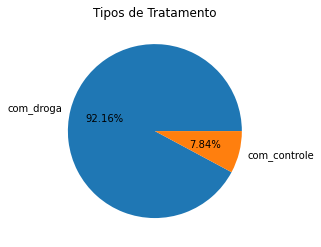

In [58]:
plt.pie(dados['tratamento'].value_counts(),labels=['com_droga','com_controle'],autopct='%1.2f%%')
plt.title('Tipos de Tratamento')

Em azul, temos a quantidade de tratamento com_drogas e em laranja temos o tratamento com_controle. Pode-se afirmar que a parte azul tem uma proporção muito maior que a parcela laranja, como já ilustrado nos dados normalizado. 

<AxesSubplot:ylabel='tempo'>

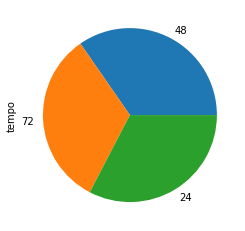

In [23]:
dados['tempo'].value_counts().plot.pie()

O gráfico de pizza (pie) pode dificultar um pouco a análise que deverá ser feita em relação aos dados analisados. Nota-se que para os dados de tempo, não conseguimos ver uma distinção de qual está em maior quantidade ou menos quantidade. Por isso, precisa-se sempre avaliar a melhor maneira de ilustrar seus dados com gráficos. 

Um gráfico de barras caberia melhor nesta análise.

<ipython-input-30-30e5bf326941>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ay = imagem.add_axes([0, 0, 1 ,1])


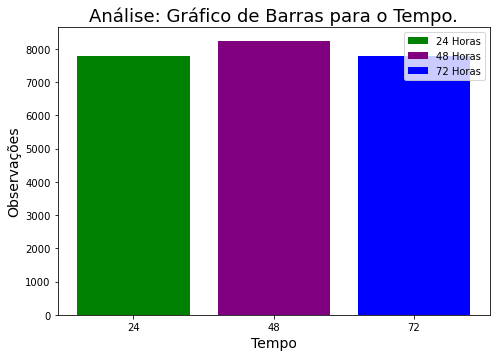

In [30]:
imagem = plt.figure()

ax = imagem.add_axes([0, 0, 1, 1])
ay = imagem.add_axes([0, 0, 1 ,1])
ax.set_title('Análise: Gráfico de Barras para o Tempo.', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ay.set_ylabel('Observações', fontsize = 14)

dados_tempo = dados['tempo'].value_counts()

a = dados_tempo.loc[24]
b = dados_tempo.loc[48]
c = dados_tempo.loc[72]

ax.bar('24', a, label = '24 Horas', color = 'green')
ax.bar('48', b, label = '48 Horas', color = 'purple')
ax.bar('72', c, label = '72 Horas', color = 'blue')

plt.legend()

O gráfico de barras ilustrou os resultados de uma maneira muito mais clara, afirmando que o tempo de 48 horas foi o que teve mais observações. 

Para sabermos se há algum valor acima de 0, utilizamos uma filtragem nos dados como descrito abaixo:

In [42]:
dados_filtrados = dados[dados['g.0'] > 0]
dados_filtrados.head()

,id,tratamento,tempo,dose,droga,g.0,g.1,g.2,g.3,g.4,...,c.90,c.91,c.92,c.93,c.94,c.95,c.96,c.97,c.98,c.99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


Temos como resposta apenas as 5 primeiras linhas com os valores maiores que 0 da coluna g-0, com a ajuda da máscara dados[dados['g-0'] > 0]. 

Podemos utilizar o comando .query para obtermos a mesma resposta. Porém, antes de utilizar o comando .query, tem-se que substituir o - por . nos nomes dos genes, pois o pandas não trabalha com - em sua biblioteca. Para isto, utiliza-se o comando .replace. 

In [44]:
dados.columns = dados.columns.str.replace('-', '.')
dados.head(10)

,id,tratamento,tempo,dose,droga,g.0,g.1,g.2,g.3,g.4,...,c.90,c.91,c.92,c.93,c.94,c.95,c.96,c.97,c.98,c.99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
5,id_001762a82,com_droga,24,D1,e06749542,-0.6111,0.2941,-0.9901,0.2277,1.2810,...,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,0.3765,0.7848,1.3990
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
8,id_00224bf20,com_droga,48,D1,952b76dfc,-0.3014,0.5545,-0.2576,-0.1390,-0.6487,...,-1.6470,0.2863,1.1070,-0.7735,-1.0280,-1.3070,-0.1167,-0.1241,-0.6420,0.5543
9,id_0023f063e,com_droga,48,D2,de7583071,-0.0630,0.2564,-0.5279,-0.2541,-0.0182,...,0.2201,0.5601,-0.3501,-1.4070,-0.1717,-1.1160,-0.8745,-0.2716,0.0189,-2.0000


A base de dados que estou utilizando tem uma variável chamada droga, mas esta não é a melhor nomenclatura para utilizar. Sendo assim, vou utilizar a função .rename da biblioteca pandas para renomear esta coluna. 

O parâmetro inplace = True faz com que os dados sejam modificados no local e o dataframe (tabela) será atualizado. Caso este parâmetro não seja declararo, o retorno será inplace = False e será uma cópia do objeto.


In [61]:
mapa = {'droga' : 'composto'}
dados.rename(columns = mapa, inplace = True)

In [62]:
dados.head()

,id,tratamento,tempo,dose,composto,g.0,g.1,g.2,g.3,g.4,...,c.90,c.91,c.92,c.93,c.94,c.95,c.96,c.97,c.98,c.99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Como o dataframe possui mais de 3000 variações de compostos, decidi elencar os 5 compostos que mais aparecem. Para isto, pode-se utilizar a função .value_counts, e como eu quero saber somente os 5 elementos mais frequentes, eu declaro .index[0:5] 

In [63]:
cod_compostos = dados['composto'].value_counts().index[0:5]
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

Nesta parte do projeto, eu quero realizar um filtro nos dados, selecionando apenas as linhas nas quais o composto esteja dentro da nossa lista cod_composto. Para isso, utilizei o método query para resolver este problema.

Vou utilizar composto porque é nesta coluna que haverá a verificação no dataframe e cod_compostos por ser a lista com os 5 compostos mais frequentes. Um detalhe: Utiliza-se @ para informar o query que o cod_composto é uma variável que já foi definida fora da função (Linha de código acima). 

In [64]:
dados.query('composto in @cod_compostos')

,id,tratamento,tempo,dose,composto,g.0,g.1,g.2,g.3,g.4,...,c.90,c.91,c.92,c.93,c.94,c.95,c.96,c.97,c.98,c.99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082
23802,id_fff3976bd,com_droga,24,D1,87d714366,3.2890,2.1270,0.9770,2.0490,2.3170,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


A filtragem realizada funcionou, como observado acima. Sendo assim, podemos utilizar a função .query como um parâmetro para o coutplot (bliboteca Seaborn). O countplot é um gráfico pr-e-projetado da biblioteca Seaborn, importada no início deste notebook. 

Para que se possa enxergar o gráfico com os padrões de configuração da biblioteca, precisei rodar sns.set(). Além disso, para refinar a apresentação do gráfico, pode-se utilizar algumas funcionalidades da Biblioteca Matplotlib (importada no ínicio deste notebook). Define-se o tamanho do gráfico através da função figure e seu parâmetro figsize=(x, y)) e o título através do set_title('Título'). Armazena-se o gráfico em uma variável ax, por exemplo, e então, define-se as demais configurações (por exemplo, ax.set_title('Título'). E, finalmente, para visualizar o gráfico de barras, usamos o plt.show().

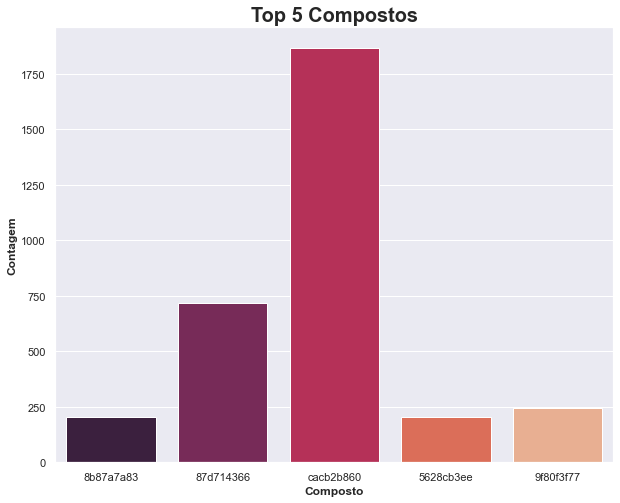

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10, 8))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'), palette = 'rocket')
ax.set_title('Top 5 Compostos', fontsize = 20, weight = 'bold')
ax.set_xlabel('Composto', fontsize = 12, weight = 'bold')
ax.set_ylabel('Contagem', fontsize = 12, weight = 'bold')

plt.show()

Até aqui, eu analise os dados de tempo, dose, compostos e etc. Porém, não analisei as expressões gênicas (denominadas como g) e a viabilidade celular (c). Primeiro, eu quero saber quantos compostos aparecem na coluna g.0. Para isto, eu posso usar a função .unique() do Pandas para contar os valores presentes na coluna que eu quero analisar. 

In [74]:
len(dados['g.0'].unique())

14367

Com a quantidade de dados dentro do g.0 é muito grande, um gráficos de barras ou de pizza não é viável. Para uma melhor visualização, utilizarei um histograma. 

Para facilitar a análise, utilizarei os comandos de .min() e .max() para entender o intervalor número com qual eu estou trabalhando. 

In [75]:
dados['g.0'].min()

-5.513

In [76]:
dados['g.0'].max()

10.0

Temos assim, os valores de -5.513 como valor mínimo e 10 como valor máximo. 

Para plotar o histograma, utilizo um recurso da biblioteca Pandas, dados['g.0'].hist(). Para melhor a visualização dos dados, é necessário acrescentar um parâmetro dentro da função (bins = x), que representará o número de quebras para melhor dividir o gráfico. 

<AxesSubplot:>

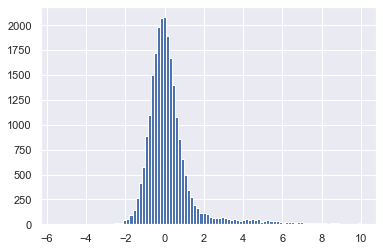

In [77]:
dados['g.0'].hist(bins = 100)

Percebe-se que este gráfico se assemelha a uma curva bastante conhecida, a curva normal, com seu centro próximo do valor 0.

Por curiosidade, plotarei o gráfico do gene g.19 para ver o seu comportamento. 

<AxesSubplot:>

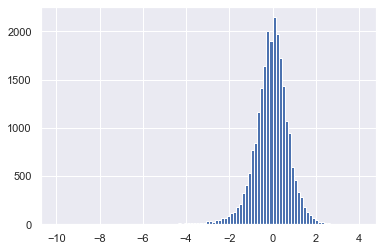

In [78]:
dados['g.19'].hist(bins = 100)

Percebe-se que o comportamento é semelhante, porém descolado para a direita. 

Para analisar algumas estatísticas dos genes, utilizei a função .describe do Pandas que já calcula e descreve algumas estatítiscas importantes para o entendimento dos dados (contagem, média, desvio padrão, mínimo e máximo).

In [79]:
dados.describe()

,tempo,g.0,g.1,g.2,g.3,g.4,g.5,g.6,g.7,g.8,...,c.90,c.91,c.92,c.93,c.94,c.95,c.96,c.97,c.98,c.99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


Para uma análise mais específica, separei dois dados (g.0 e g.1) através de uma lista de arrays. 

In [81]:
dados[['g.0', 'g.1']]

,g.0,g.1
0,1.0620,0.5577
1,0.0743,0.4087
2,0.6280,0.5817
3,-0.5138,-0.2491
4,-0.3254,-0.4009
...,...,...
23809,0.1394,-0.0636
23810,-1.3260,0.3478
23811,0.3942,0.3756
23812,0.6660,0.2324


Uma abordagem mais direta (em que não precisa escrever a lista gene a gene) é o uso da função .loc[] da biblioteca Pandas. Como argumentos, primeiramente o :, os dois pontos faz com que o .loc[] retorne todos os elementos de uma determinada coluna, isso é importante quando não se sabe qual a quantidade de linhas de um dataframe (tabela). E, o segundo elemento, passamos as colunas que são do meu interesse. No caso, eu quero que a função me retorne todos os elementos das colunas g.0 até g.771. Pode-se declarar a função de interesse a partir deste filtro realizado nos dados, o describe().

In [82]:
dados.loc[:, 'g.0' : 'g.771'].describe()

,g.0,g.1,g.2,g.3,g.4,g.5,g.6,g.7,g.8,g.9,...,g.762,g.763,g.764,g.765,g.766,g.767,g.768,g.769,g.770,g.771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,...,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,...,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,...,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,...,-0.433875,-0.502250,-0.537075,-0.508775,-0.606175,-0.506200,-0.353100,-0.544600,-0.554400,-0.523800
50%,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,0.160450,...,0.059600,-0.005900,-0.013600,-0.027700,-0.011850,0.009900,0.005400,0.000600,0.028700,-0.006500
75%,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,0.697775,...,0.648500,0.492150,0.522500,0.457000,0.483000,0.511175,0.409075,0.498500,0.496400,0.536950
max,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,6.433000,...,10.000000,9.552000,10.000000,8.346000,5.444000,6.317000,10.000000,5.911000,10.000000,10.000000


A função .describe() reuni estatísticas bem interessantes, mas é complexo de se analisar o dataframe de resposta. Para facilitar a visualização dos resultados, plotarei histogramas na visualização das estatísticas de todas as colunas selecionadas. Como eu quero fazer um histograma a partir das linhas (estatísticas), precisarei transpor as linhas e colunas (transformar linhas em colunas). O comando utilizado é o .T[], ou seja, mantenho o código descrito acima e só adiciono o .T[] no final. 

Para melhorar a análise, adiciono no .T[] a estatística que eu quero visualizar (.T['mean']) e .hist(bins  = 100) para obter o histograma desejado.

<AxesSubplot:>

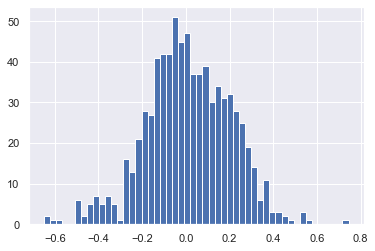

In [83]:
dados.loc[:, 'g.0' : 'g.771'].describe().T['mean'].hist(bins = 50)

Abaixo, plotei os histogramas com o parâmetro estatístico mínimo e máximo para ser analisado. Com isso, pode-se percerber as características individuais de cada métrica. 

<AxesSubplot:>

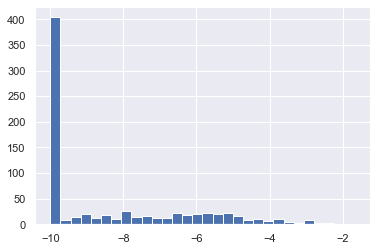

In [84]:
dados.loc[:, 'g.0' : 'g.771'].describe().T['min'].hist(bins = 30)

<AxesSubplot:>

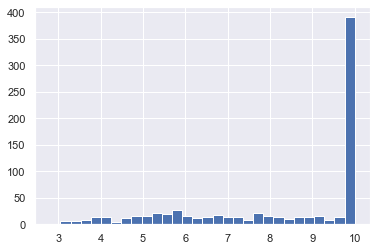

In [85]:
dados.loc[:, 'g.0' : 'g.771'].describe().T['max'].hist(bins = 30)

Analisando a viabilidade celular, temos os histogramas abaixo. 

In [86]:
dados.loc[:, 'c.0' : 'c.99'].describe()


,c.0,c.1,c.2,c.3,c.4,c.5,c.6,c.7,c.8,c.9,...,c.90,c.91,c.92,c.93,c.94,c.95,c.96,c.97,c.98,c.99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,-0.355156,-0.455359,-0.480542,-0.377666,-0.493552,-0.446037,-0.574855,-0.266293,-0.451307,-0.458664,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,1.752565,2.004962,2.039346,1.554583,2.091888,1.893484,2.234152,1.465313,1.948829,1.646122,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,-0.549300,-0.538425,-0.550375,-0.601975,-0.559975,-0.578775,-0.571250,-0.524275,-0.551100,-0.654675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,-0.009000,0.009800,-0.004000,-0.039050,0.011400,-0.008900,0.007400,0.006350,-0.005350,-0.025350,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,0.448975,0.476875,0.460575,0.413100,0.470300,0.442675,0.459475,0.469375,0.453175,0.424400,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,3.365000,3.915000,2.970000,2.408000,4.555000,3.614000,3.904000,4.918000,3.648000,3.194000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


<AxesSubplot:>

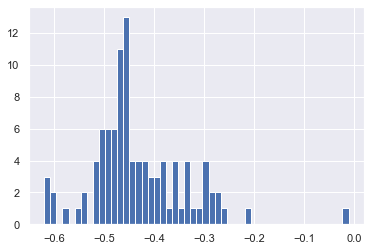

In [87]:
dados.loc[:, 'c.0' : 'c.99'].describe().T['mean'].hist(bins = 50)

<AxesSubplot:>

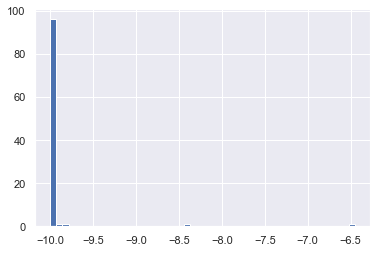

In [88]:
dados.loc[:, 'c.0' : 'c.99'].describe().T['min'].hist(bins = 50)

<AxesSubplot:>

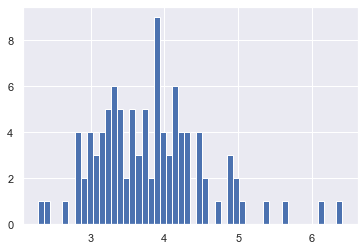

In [89]:
dados.loc[:, 'c.0' : 'c.99'].describe().T['max'].hist(bins = 50)

Um outro modelo de gráfico que se pode utilizar é o boxplot. 

Para isto, utiliza-se a função boxplot da biblioteca Seaborn. Como argumentos dessa função: x, onde x = coluna que será plotada neste eixo e a base de dados data = conjunto de dados. 

O boxplot apresenta uma caixa no meio onde podemos identificar a mediana (linha no meio da caixa que é o ponto onde metade dos dados estão na direita e a outra metade para a esquerda), os outliers (pontos acima ou abaixo do eixo principal do gráfico que representam valores discrepantes para mais ou para menos), a maior concentração dos dados (caixa principal que representa onde está a mior parte dos dados - primeiro quartil (25%) e terceiro quartil (75%)) e os máximos e mínimos desconsiderando os outliers (linhas laterais à caixa principal). 

O boxplot é uma importante ferramenta na visualização de dados porque em apenas um gráfico, podemos identificar várias métricas estatísticas.

<AxesSubplot:xlabel='g.0'>

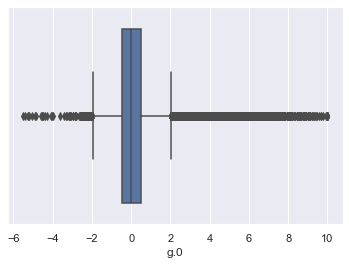

In [90]:
sns.boxplot(x = 'g.0', data = dados)

Pode-se também atribuir um valor para o parâmetro y, y = variável que se deseja plotar no eixo, como demonstrado abaixo.

<AxesSubplot:xlabel='tratamento', ylabel='g.0'>

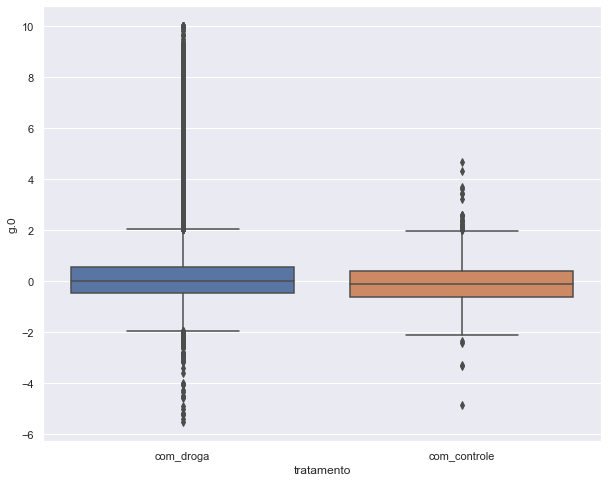

In [91]:
plt.figure(figsize = (10, 8))
sns.boxplot(y = 'g.0', x = 'tratamento', data = dados)

Pode-se plotar histogramas pela biblioteca do Seaborn também.

O comando kde = True adiciona uma linha de tendência do histograma.

A função histplot já plota o histograma com uma quantidade maior de bins, sem a necessidade de digitar um valor x para bins. 

<AxesSubplot:xlabel='g.0', ylabel='Count'>

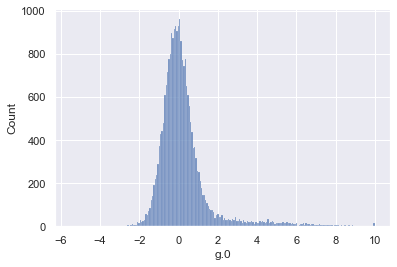

In [97]:
sns.histplot(data = dados, x = 'g.0')

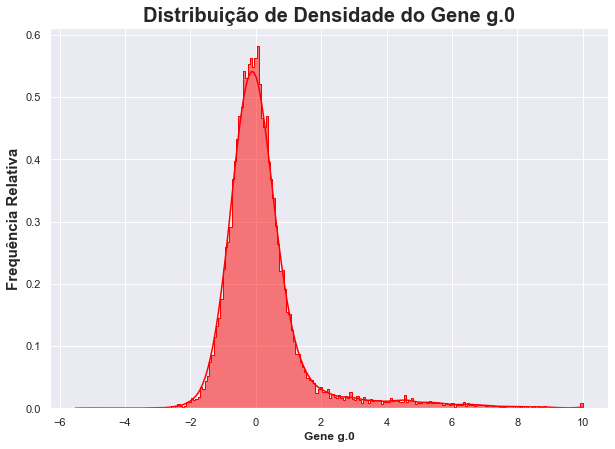

In [99]:
plt.figure(figsize=(10,7))

ax = sns.histplot(data = dados, x = 'g.0',kde = True, element = "step", stat = 'density', color = 'red')
ax.set_title('Distribuição de Densidade do Gene g.0',fontsize = 20, weight = 'bold')
ax.set_ylabel('Frequência Relativa',fontsize = 15, weight = 'bold')
ax.set_xlabel('Gene g.0',fontsize = 12, weight = 'bold')

plt.show()

Em uma busca rápida na documentação do Pandas, achei a função crosstab, que constrói uma tabela de frequências. Esta função recebe como argumentos os dados que eu quero correlacionar: crosstab(dataframe['coluna1'], dataframe['coluna2']). Como resposta, obtêm-se uma matriz que relaciona as variáveis a partir da frequência. 

Pode-se utilizar também a função .groupby para agrupar os dados de uma tabela.

In [100]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [120]:
tabela1 = dados.groupby(by = ['dose'])['tempo'].value_counts()
tabela1.unstack()

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


Porém, preciso adicionar a coluna de tratamento, para entender melhor os resultados obtidos. O resultado será uma tabela de frequência com diversos valores. Para melhorar ainda mais a análise, adicionei o comando normalize = 'index' no final para explorar a proporção de cada resultado, fazendo com que a soma de cada linha seja igual à 1. 

Com esses resultados, pode-se concluir se há proporcionalidade na base de dados, por exemplo. 

In [102]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Para complementar mais ainda a matriz, pode-se adicionar uma métrica estatística associada a uma coluna. Para isto, adiciona-se mais dois parâmetros à função pd.crosstab: values = dataframe['variável'] e o segundo é o .aggfunc que recebe como parâmetro alguma métrica estatística (média, mediana). 

In [103]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g.0'], aggfunc = 'mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Construir tabelas de frequências não é a melhor estratégia para analisar. Porém, construir um novo tipo de gráfico, pode ser mais vantajoso para esta análise. 

Para facilitar, eu filtrei a base de dados com duas colunas que quero investigar, as colunas g.1 e g.4. 

In [104]:
dados[['g.1', 'g.4']]

,g.1,g.4
0,0.5577,-0.1944
1,0.4087,1.0190
2,0.5817,-0.0323
3,-0.2491,4.0620
4,-0.4009,1.4180
...,...,...
23809,-0.0636,-0.4713
23810,0.3478,-0.7178
23811,0.3756,0.5505
23812,0.2324,0.8531


Pela biblioteca do Seaborn, eu tenho disponível o gráfico de dispersão que recebe como parâmetros a variável que vai ser usada no eixo x, a variável que vai ser usada no eixo y e por fim, o conjunto de dados. 

O gráfico de dispersão utiliza os dados como uma coleção de pontos cartesianos e ele é usado para averiguar se há alguma relação de causa e efeito entre duas variáveis quantitativas. 

É válido lembrar que o gráfico de dispersão não retorna como resposta se uma variável afeta de alguma maneira uma outra variável, ele apenas ilustra a relação entre elas e qual é a intensidade desta relação. 

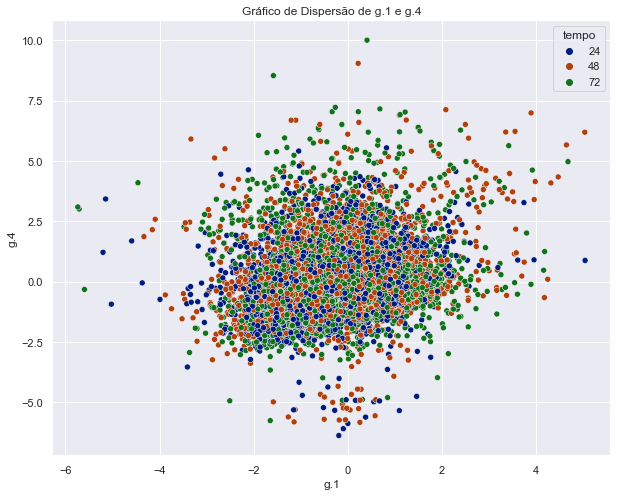

In [106]:
plt.figure(figsize = (10, 8))

ax = sns.scatterplot(x = 'g.1', y = 'g.4', data = dados, hue = 'tempo', palette = 'dark')
ax.set_title('Gráfico de Dispersão de g.1 e g.4')

plt.show()

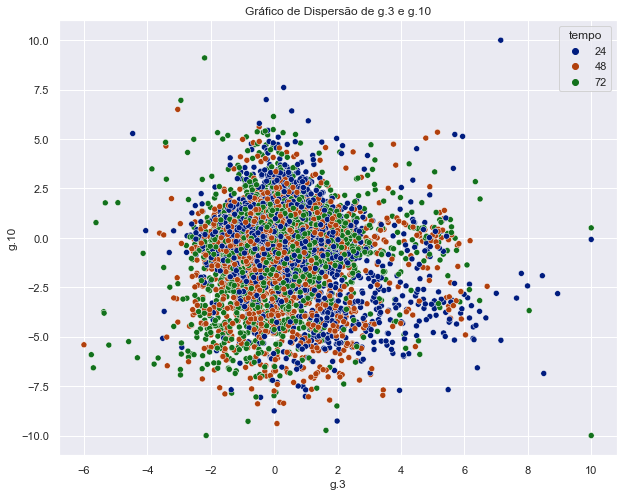

In [107]:
plt.figure(figsize = (10, 8))

ax = sns.scatterplot(x = 'g.3', y = 'g.10', data = dados, hue = 'tempo', palette = 'dark')
ax.set_title('Gráfico de Dispersão de g.3 e g.10')

plt.show()

Percebe-se uma alteração de comportamento entre os dois gráficos de dispersão. Para melhorar e facilitar a análise, pode-se utilizar uma função da biblioteca Seaborn chamada sns.lmplot, a qual vai acrescentar no gráfico de dispersão, uma linha de tendência. 

<Figure size 720x576 with 0 Axes>

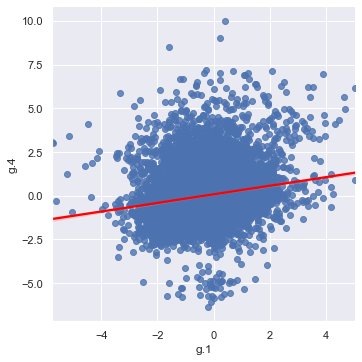

In [109]:
plt.figure(figsize = (10, 8))

ax = sns.lmplot(data = dados, x = 'g.1', y = 'g.4', line_kws = {'color': 'red'})

plt.show()

<Figure size 720x576 with 0 Axes>

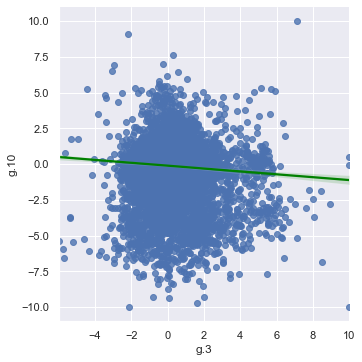

In [110]:
plt.figure(figsize = (10, 8))

ax = sns.lmplot(data = dados, x = 'g.3', y = 'g.10', line_kws = {'color': 'green'})

plt.show()

Para uma análise mais completa, é interessante separar mais ainda o conjunto de dados. Como o estudo aqui é sobre drug delivery, infomrações como tempo, tratamento, dosagem, são muito importantes e não podem ficar de fora da análise. 

Para isto, adicionamos alguns parâmetros para melhorar a análise: col = tratamento, row = tempo. Estes dois parâmetros farão com que o gráfico plotaddo ilustre as categorias da variável em questão, no caso tratamento e tempo. 

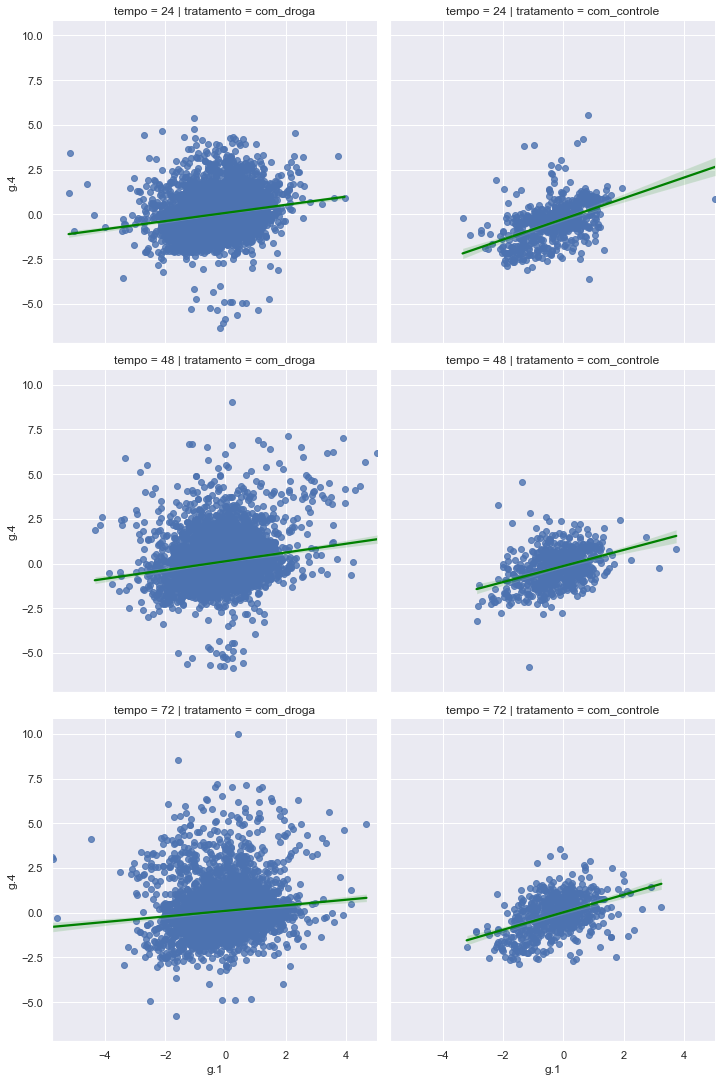

In [111]:
sns.lmplot(data = dados, x = 'g.1', y = 'g.4', line_kws = {'color': 'green'}, col = 'tratamento', row = 'tempo')

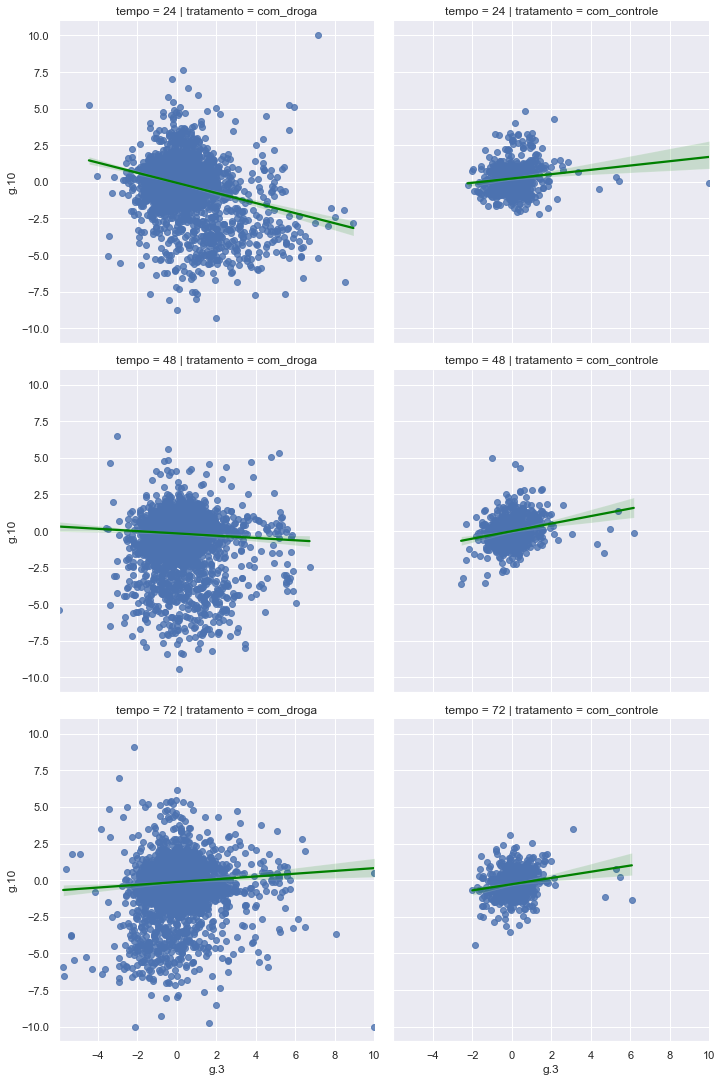

In [112]:
sns.lmplot(data = dados, x = 'g.3', y = 'g.10', line_kws = {'color': 'green'}, col = 'tratamento', row = 'tempo')

Uma outra medida para analisar como as variáveis estão associadas é a correlação.

Para isso, utiliza-se a função loc[] do Pandas mais vamos a .corr. 
O loc[] serve para definirmos o intervalo em que a correlação vai ser calculada. 

Tem-se como retorno uma tabela bem grande que correlaciona a variável e apresenta valores entre 1 e -1. 
Por exemplo, o primeiro valor numérico apresentado na primeira linha é o resultado da correlação entre a variável que está nesta linha e nesta coluna, no nosso caso, o g-0 em ambas as extremidades. 
No primeiro valor numérico apresentado na segunda linha, temos a correlação entre g-1 e g-0 e assim por diante.

Para interpretar estes valores, temos:

- Valor muito próximo de 1 ou -1: variáveis altamente correlacionadas;
- Valor muito próximo de 1: variáveis proporcionalmente correlacionadas;
- Valor muito próximo de -1: variáveis correlacionadas inversamente proporcionais;
- Valor muito próximo de 0: variáveis pouco ou não correlacionadas;

In [113]:
dados.loc[:, 'g.0' : 'g.771'].corr()

,g.0,g.1,g.2,g.3,g.4,g.5,g.6,g.7,g.8,g.9,...,g.762,g.763,g.764,g.765,g.766,g.767,g.768,g.769,g.770,g.771
g.0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g.1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g.2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g.3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g.4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g.767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g.768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g.769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g.770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


In [114]:
dados.loc[:, 'c.0' : 'c.99'].corr()

,c.0,c.1,c.2,c.3,c.4,c.5,c.6,c.7,c.8,c.9,...,c.90,c.91,c.92,c.93,c.94,c.95,c.96,c.97,c.98,c.99
c.0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,...,0.835217,0.832529,0.799196,0.817657,0.846457,0.815499,0.845579,0.834513,0.800682,0.777426
c.1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,...,0.875405,0.839236,0.876519,0.868431,0.886750,0.803637,0.871383,0.866084,0.815952,0.781510
c.2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,...,0.902964,0.872660,0.883866,0.885419,0.906584,0.837420,0.898270,0.874869,0.839640,0.802032
c.3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,...,0.825342,0.813555,0.812200,0.803603,0.830301,0.799760,0.822001,0.814889,0.779998,0.768872
c.4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,...,0.895967,0.890255,0.882185,0.868684,0.900309,0.839111,0.901603,0.873534,0.834823,0.795218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c.95,0.815499,0.803637,0.837420,0.799760,0.839111,0.834881,0.809419,0.775249,0.829459,0.763117,...,0.818838,0.803295,0.793390,0.787176,0.819529,1.000000,0.821950,0.811155,0.787529,0.758110
c.96,0.845579,0.871383,0.898270,0.822001,0.901603,0.873973,0.900005,0.824395,0.879109,0.819864,...,0.888795,0.876358,0.867251,0.873935,0.894631,0.821950,1.000000,0.863061,0.819600,0.789649
c.97,0.834513,0.866084,0.874869,0.814889,0.873534,0.872085,0.856279,0.793950,0.871410,0.805856,...,0.860923,0.849142,0.836722,0.840606,0.862876,0.811155,0.863061,1.000000,0.801809,0.775300
c.98,0.800682,0.815952,0.839640,0.779998,0.834823,0.820600,0.836485,0.772028,0.842810,0.811111,...,0.816530,0.818789,0.802289,0.811567,0.824202,0.787529,0.819600,0.801809,1.000000,0.755991


Como resultado, tem-se uma tabela muito grande e de difícil análise. Para facilitar, pode-se plotar um mapa de calor, para identificar com maior facilidade a correlação entre as variáveis. 

Para isto, trabalhei com duas bibliotecas, a do Seaborn para a correlação e a do Numpy para o mapa de calor. 

<AxesSubplot:>

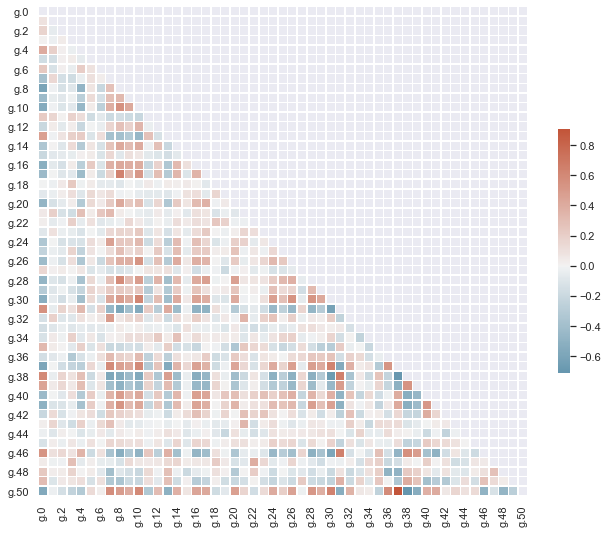

In [117]:
import numpy as np

corr1 = dados.loc[:,'g.0':'g.50'].corr()

mask = np.triu(np.ones_like(corr1, dtype = bool))
f, ax = plt.subplots(figsize = (11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr1, mask = mask, cmap = cmap, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5})

<AxesSubplot:>

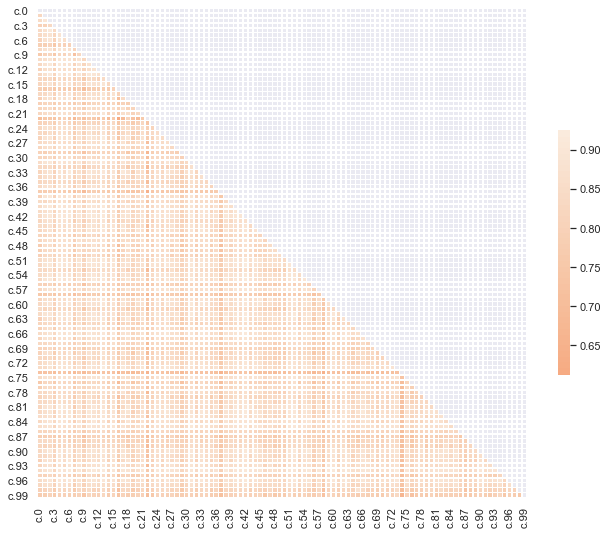

In [122]:
import numpy as np

corr2 = dados.loc[:,'c.0':'c.99'].corr()

mask = np.triu(np.ones_like(corr2, dtype = bool))
f, ax = plt.subplots(figsize = (11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr2, mask = mask, cmap = 'rocket', center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5})